In [2]:
import pennylane as qml
from qiskit_quantuminspire.qi_provider import QIProvider
from pennylane_quantuminspire.qi_device import QIDevice
from pennylane.qinfo import fidelity
import pennylane.numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
def datos(muestras):
    x = 2 * np.random.rand(muestras, 2) - 1
    y = (x[:,0]>= 0).astype(int)
    return x,y
    
def graficar_bolitas(x, y, titulo):
    fig, ax = plt.subplots(figsize=(5, 5))
    rojas = y == 0
    azules = y == 1

    ax.scatter(x[rojas, 0], x[rojas, 1], color='red', edgecolors='k', label='Clase 0')
    ax.scatter(x[azules, 0], x[azules, 1], color='blue', edgecolors='k', label='Clase 1')
    ax.axvline(0, color='gray', linestyle='--', label='Límite x = 0')
    ax.set_title(titulo)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    plt.grid(True)
    plt.show()
     

provider = QIProvider()
backend = provider.get_backend('Tuna-5')
demo_device = QIDevice(backend)

dev = demo_device

@qml.qnode(dev)
def dru_circuit(p, x):
     qml.RX(x[0], wires=0)  
     qml.RY(p[0] * x[0] + p[1], wires=0)
     qml.RZ(p[2], wires=0)
     
     return qml.probs(wires=0) 

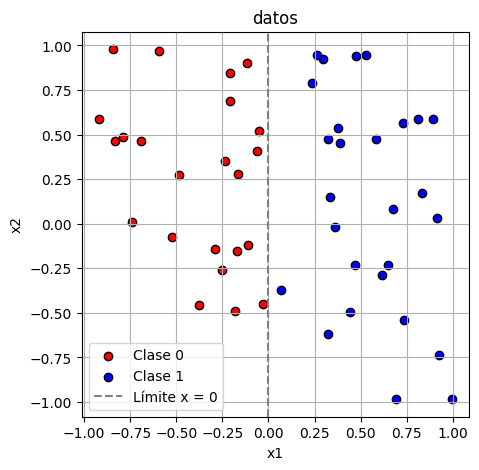

In [7]:
x,y = datos(50)
graficar_bolitas(x,y,'datos')


In [8]:
def predecir(x, params):
    probas = dru_circuit(params, x)
    return int(np.argmax(probas))  

Exactitud (random): 1.0


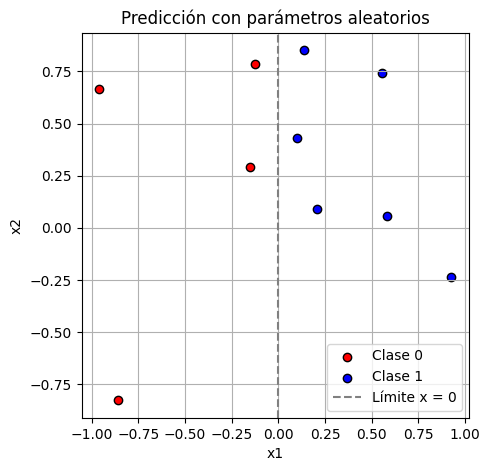

In [123]:
np.random.seed(0)


x_train, y_train = datos(10)


params = [2.5068949 , 1.51682233 ,0.97873798]



predicciones = np.array([predecir(x, params) for x in x_train])


exactitud = np.mean(predicciones == y_train)
print("Exactitud (random):", exactitud)


graficar_bolitas(x_train, predicciones, "Predicción con parámetros calculados")

Exactitud (random): 1.0


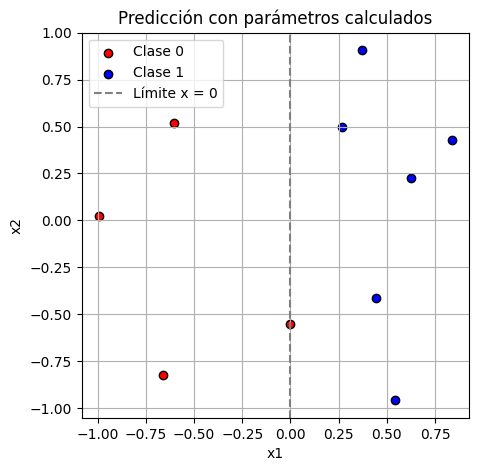

In [124]:
np.random.seed(10)


x_train, y_train = datos(10)


params = [2.5068949 , 1.51682233 ,0.97873798]



predicciones = np.array([predecir(x, params) for x in x_train])


exactitud = np.mean(predicciones == y_train)
print("Exactitud (random):", exactitud)


graficar_bolitas(x_train, predicciones, "Predicción con parámetros calculados")

Exactitud (random): 0.98


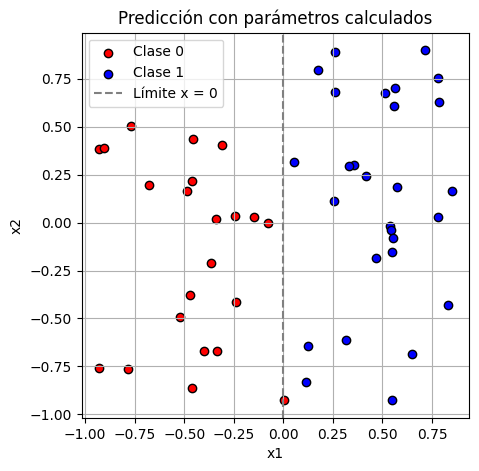

In [ ]:
np.random.seed(20)


x_train, y_train = datos(50)


params = [2.5068949 , 1.51682233 ,0.97873798]



predicciones = np.array([predecir(x, params) for x in x_train])


exactitud = np.mean(predicciones == y_train)
print("Exactitud :", exactitud)


graficar_bolitas(x_train, predicciones, "Predicción con parámetros calculados")